
<div>
    <h1 align=center style="font-size: 12; font-weight: 900; ">--- 3 ---<h1>
    <h2 align=center>CSiAPI - ETABS y SAP200</h2>
    <!-- <p><strong></strong</p> -->
    <p align="center"><font color = orange >Bach. Ing. Francisco Jimenez Mucho (fjmucho0@gmail.com)</font></p> 
    <p align="center"><font color = green >2022, update: 2025</font></p> 
</div>

---

# Código parametrico para estructuras tipo cercha o Armadura

In [6]:
# !pip install comtypes numpy

In [7]:
import os, sys, numpy as np
import comtypes.client

## 1. Uso de sistema de Unidades

In [8]:
# Unidades Base mks
m = 1
kg = 1
s = 1

# Otras Unidades
cm = 0.01*m
kgf = 9.80665*kg*m/s**2
tonf = 1000*kgf

# Constantes Físicas
g = 9.80665*m/s**2

# configuraciones de unidades
kip_in_F = 3
kip_ft_F = 4
kN_m_C = 6
kgf_m_C = 8
Tonf_m_C = 12

## 2. Propiedades, materiales y geometria o modelo

### Ejemplo-01a

In [ ]:
# use_units = kip_ft_F

# E = 1.0 #* (ksi)
# v = 0.2
# G = 0.5 *E / (1+v) # Shear modulus [kgf/cm**2]
# coeficienteTermico = 1.2e-5

# material_type = 1;
# material_name = f'STEEL';

# my_type_section = 'general'
# # --- parametros para una secciones general de tipo truss de fierro o acero
# Name = "truss"
# MatProp = material_name # The name of the material property for the section.
# t3 = 0.001 # The section depth. [L]
# t2 = 0.001 # The section width. [L]
# area = 1.000 # The cross-sectional area. [L2], [in^2]
# As2 = 0.001 # The shear area for forces in the section local 2-axis direction. [L2]
# As3 = 0.001 # The shear area for forces in the section local 3-axis direction. [L2]
# Torsion = 1e-6 # The torsional constant. [L4]
# I22 = 1e-6 # The moment of inertia for bending about the local 2 axis. [L4]
# I33 = 1e-6 # The moment of inertia for bending about the local 3 axis. [L4]
# S22 = 1e-6 # The section modulus for bending about the local 2 axis. [L3]
# S33 = 1e-6 # The section modulus for bending about the local 3 axis. [L3]
# Z22 = 1e-6 # The plastic modulus for bending about the local 2 axis. [L3]
# Z33 = 1e-6 # The plastic modulus for bending about the local 3 axis. [L3]
# R22 = 1e-6 # The radius of gyration about the local 2 axis. [L]
# R33 = 1e-6 # The radius of gyration about the local 3 axis. [L]
# # Opcionales
# Color = -1
# Notes = ""
# GUID = ""

# #  coordenadas : coords[x, y, z], se va graficar en el plano XZ 
# coords = [
#     ( 0.00, 0.0, 0.00 ),
#     ( 8.00, 0.0, 6.00 ),
#     ( 16.00, 0.0, 12.00 ),
#     ( 24.00, 0.0, 18.00 ),
#     ( 16.00, 0.0, 18.00 ),
#     ( 8.00, 0.0, 18.00 ),
# ];

# elems = [
#     (0, 1), # elemento 0
#     (1, 2), # elemento 1
#     (2, 3), # elemento 2
#     (3, 4), # elemento 3
#     (4, 5), # elemento 4
#     (5, 0), # elemento 5
#     (5, 1), # elemento 6
#     (5, 2), # elemento 7
#     (4, 2), # elemento 8
# ];
# # reles | Releases, deshabilitar los grados de libertad
# restraint_ij_start_end = np.array([
#     [False, False, 0.0, 0.0], # Axial Load
#     [False, False, 0.0, 0.0], # Shear Force 2 (Major)
#     [False, False, 0.0, 0.0], # Shear Force 3 (Minor)
#     [False, False, 0.0, 0.0], # Torsion
#     [False, False, 0.0, 0.0], # Moment 22 (Minor)
#     [True, True, 0.0, 0.0], # Moment 33 (Major)
# ]);

# apoyos = np.array([
#     [1, False, True, True, False, False, False],
#     [4, True, True, True, False, False, False],
# ]);

# # cargas puntual
# NamePattern = "CargaPuntual"
# #   cargaPuntual[idNodo, Fx, Fy, Fz, Rx, Ry, Rz]
# LTYPE = 1 # LTYPE_OTHER=8
# cargaPuntuales = np.array([
#     [5, 0.0, 0.0, -2.0, 0.0, 0.0, 0.0],
#     [6, 0.0, 0.0, -1.5, 0.0, 0.0, 0.0],
# ])

# nameModelProject = 'Ejemplo academico de Cercha (2D)'
# # Coneccion: 1 para sap2000 y 2 para etabs
# connect_to = 1;

# # # Variable para definir una instancia manual para el programa y definir la ruta.
# # rutaEspecifica = False
# # path_sap200 = "C:\\Program Files\\Computers and Structures\\SAP2000 23\\SAP2000.exe"
# # path_etabs =  "C:\\Program Files\\Computers and Structures\\ETABS 20\\ETABS.exe"

### Ejemplo-01

- Ejemplos extraidos del Articulo http://dx.doi.org/10.1016/j.eswa.2015.04.072

<center>
<img src="./images/truss-e1.png" alt="" width="50%" />
</center>

In [ ]:
use_units = kip_in_F

E = 1e4 #* (ksi)
v = 0.3
G = 0.5 *E / (1+v) # Shear modulus [kgf/cm**2]
coeficienteTermico = 7.85e-9

material_type = 1;
material_name = f'STEEL';

my_type_section = 'general'
# --- parametros para una secciones general de tipo truss de fierro o acero
Name = "truss"
MatProp = material_name # The name of the material property for the section.
t3 = 0.001 # The section depth. [L]
t2 = 0.001 # The section width. [L]
area = 0.111 # The cross-sectional area. [L2], [in^2]
As2 = 0.111 # The shear area for forces in the section local 2-axis direction. [L2]
As3 = 0.111 # The shear area for forces in the section local 3-axis direction. [L2]
Torsion = 1e-6 # The torsional constant. [L4]
I22 = 1e-6 # The moment of inertia for bending about the local 2 axis. [L4]
I33 = 1e-6 # The moment of inertia for bending about the local 3 axis. [L4]
S22 = 1e-6 # The section modulus for bending about the local 2 axis. [L3]
S33 = 1e-6 # The section modulus for bending about the local 3 axis. [L3]
Z22 = 1e-6 # The plastic modulus for bending about the local 2 axis. [L3]
Z33 = 1e-6 # The plastic modulus for bending about the local 3 axis. [L3]
R22 = 1e-6 # The radius of gyration about the local 2 axis. [L]
R33 = 1e-6 # The radius of gyration about the local 3 axis. [L]
# Opcionales
Color = -1
Notes = ""
GUID = ""

#  coordenadas : coords[x, y, z], se va graficar en el plano XZ 
coords = [
    (0.0, 0.0, 120.0 ),
    (120.0, 0.0, 120.0 ),
    (240.0, 0.0, 120.0 ),
    (360.0, 0.0, 120.0 ),
    (0.0, 0.0, 0.0 ),
    (120.0, 0.0, 0.0 ),
    (240.0, 0.0, 0.0 ),
    (360.0, 0.0, 0.0 ),
];

elems = [
    (0, 1), # elemento 0
    (1, 2), # elemento 1
    (2, 3), # elemento 2
    (4, 5), # elemento 3
    (5, 6), # elemento 4
    (6, 7), # elemento 5
    (5, 1), # elemento 6
    (6, 2), # elemento 7
    (7, 3), # elemento 8
    (0, 5), # elemento 9
    (4, 1), # elemento 10
    (1, 6), # elemento 11
    (5, 2), # elemento 12
    (2, 7), # elemento 13
    (6, 3), # elemento 14
];
# reles | Releases, deshabilitar los grados de libertad
restraint_ij_start_end = np.array([
    [False, False, 0.0, 0.0], # Axial Load
    [False, False, 0.0, 0.0], # Shear Force 2 (Major)
    [False, False, 0.0, 0.0], # Shear Force 3 (Minor)
    [False, False, 0.0, 0.0], # Torsion
    [False, False, 0.0, 0.0], # Moment 22 (Minor)
    [True, True, 0.0, 0.0], # Moment 33 (Major)
]);

apoyos = np.array([
    [1, True, True, True, False, False, False],
    [5, True, True, True, False, False, False],
]);

# cargas puntual
NamePattern = "CargaPuntual"
#   cargaPuntual[idNodo, Fx, Fy, Fz, Rx, Ry, Rz]
LTYPE = 8 # LTYPE_OTHER=8
cargaPuntuales = np.array([
    [8, 0.0, 0.0, -10.0, 0.0, 0.0, 0.0],
])

nameModelProject = 'Ejemplo academico de Cercha (2D)'
# Coneccion: 1 para sap2000 y 2 para etabs
connect_to = 1;

# # Variable para definir una instancia manual para el programa y definir la ruta.
# rutaEspecifica = False
# path_sap200 = "C:\\Program Files\\Computers and Structures\\SAP2000 23\\SAP2000.exe"
# path_etabs =  "C:\\Program Files\\Computers and Structures\\ETABS 20\\ETABS.exe"

### Ejemplo-02

- Ejemplos extraidos del Articulo http://dx.doi.org/10.1016/j.eswa.2015.04.072

<center>
<img src="./images/truss-e1-3d.png" alt="" width="50%" />
</center>
<!-- https://www.tandfonline.com/cms/asset/bc44f9a9-d048-4b77-a4ed-41715db6f895/tjit_a_1946740_f0005_oc.jpg -->

In [11]:
# use_units = kip_ft_F

# E = 1e4 #* (ksi)
# v = 0.2
# # G = 0.5 *E / (1+v) # Shear modulus [kgf/cm**2]
# coeficienteTermico = 0.0000055
# area = (0.111)**(0.5)

# Name = "truss"
# material_type = 1; # MATERIAL_CONCRETE = 1
# material_name = 'OTROS';

# # --- parametros para una secciones general de tipo truss de fierro o acero
# my_type_section = 'rectangular'
# section_name = 'R1';

# #  coordenadas : coords[x, y, z], se va graficar en el plano XZ 
# coords = [
#     (-37.5, 0.0, 200.0),
#     (37.5, 0.0, 200.0),
#     (-37.5, 37.5, 100.0),
#     (37.5, 37.5, 100.0),
#     (37.5, -37.5, 100.0),
#     (-37.5, -37.5, 100.0),
#     (-100.0, 100.0, 0.0),
#     (100.0, 100.0, 0.0),
#     (100.0, -100.0, 0.0),
#     (-100.0, -100.0, 0.0)
# ];

# elems = [
#     [0,1], # elemento 1
#     [3,2], # elemento 2
#     [2,1], # elemento 3
#     [4,0], # elemento 4
#     [5,1], # elemento 5
#     [3,1], # elemento 6
#     [4,1], # elemento 7
#     [2,0], # elemento 8
#     [5,0], # elemento 9
#     [5,2], # elemento 10
#     [4,3], # elemento 11
#     [2,3], # elemento 12
#     [5,4], # elemento 13
#     [9,2], # elemento 14
#     [6,5], # elemento 15
#     [8,3], # elemento 16
#     [7,4], # elemento 17
#     [6,3], # elemento 18
#     [7,2], # elemento 19
#     [9,4], # elemento 20
#     [8,5], # elemento 21
#     [9,5], # elemento 22
#     [6,2], # elemento 23
#     [7,3], # elemento 24
#     [8,4], # elemento 25
# ];
# # reles | Releases, deshabilitar los grados de libertad
# restraint_ij_start_end = np.array([
#     [True, True, 0, 0], # Axial Load
#     [True, True, 0, 0], # Shear Force 2 (Major)
#     [False, False, 0, 0], # Shear Force 2 (Minor)
#     [False, False, 0, 0], # Torsion
#     [False, False, 0, 0], # Moment 22 (Minor)
#     [False, False, 0, 0] # Moment 33 (Major)
# ]);

# # Restricciones | restraints
# apoyos = np.array([
#     [7, True, True, True, True, False, False],
#     [8, True, True, True, True, False, False],
#     [9, True, True, True, True, False, False],
#     [10, True, True, True, True, False, False]
# ]);

# # cargas puntual | LoadPoint
# NamePattern = "CargaPuntual"
# LTYPE = 8 # LTYPE_OTHER=8
# #   cargaPuntual[idNodo, Fx, Fy, Fz, Rx, Ry, Rz]
# cargaPuntuales = np.array([
#     [1, 1.0, -10.0, -10.0, 0.0, 0.0, 0.0],
#     [2, 0.0, -10.0, -10.0, 0.0, 0.0, 0.0],
#     [3, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0],
#     [6, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],
# ])

# nameModelProject = 'Ejemplo academico de Cercha (3D)'
# # Coneccion: 1 para sap2000 y 2 para etabs
# connect_to = 1;

# # # Variable para definir una instancia manual para el programa y definir la ruta.
# # rutaEspecifica = False
# # path_sap200 = "C:\\Program Files\\Computers and Structures\\SAP2000 23\\SAP2000.exe"
# # path_etabs =  "C:\\Program Files\\Computers and Structures\\ETABS 20\\ETABS.exe"

## 3. Coneccion

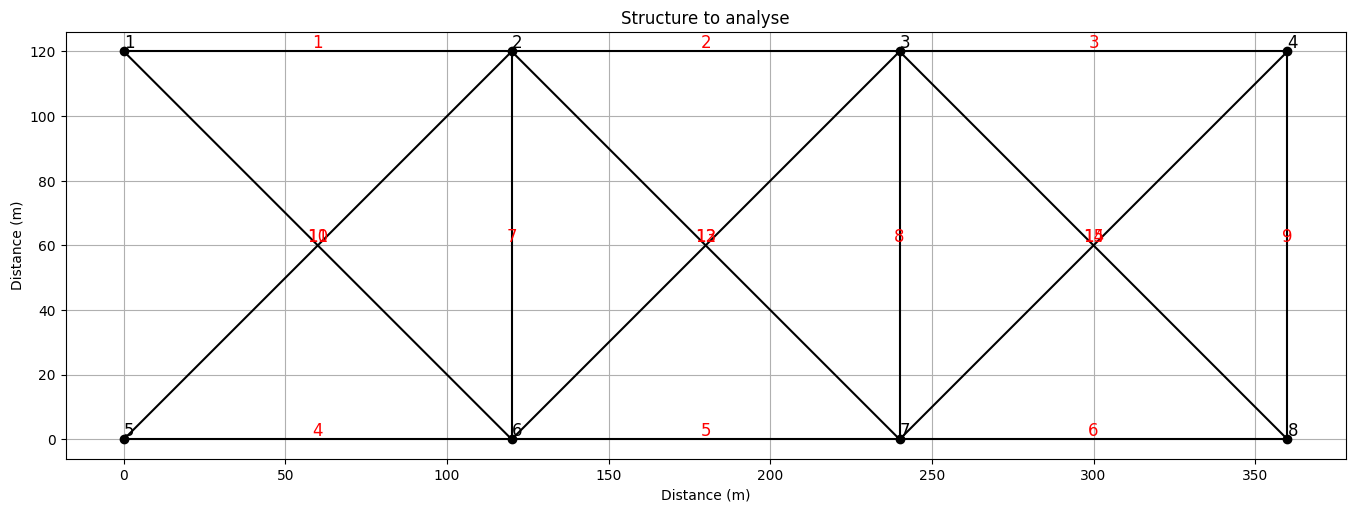

In [40]:
from utilities.plotModel import plotModel2d, plotModel3d

plotModel2d(coords, elems, nameModelProject)
# plotModel3d(coords, elems, nameModelProject)

In [13]:
from utilities.connectcsi import ConnectCSiAPI

Coneccion por defecto o uso de una version mas reciente instalada.

In [14]:
smodel, response = None, None

connection = ConnectCSiAPI(connect_to)
response, connect_to_app = connection.connect_default()
response

SAP2000
Coneccion establecida para SAP2000!.


True

Instancia a una aplicacion en especifico bajo ruta

In [15]:
# if rutaEspecifica: 
#     ruta_programa = path_sap200 if (connect_to==1) else path_etabs
# response, connect_to_app = connection.connect_manually(ruta_programa)

Abrir o ejecutar la aplicacion

In [16]:
connect_to_app.ApplicationStart()

smodel = connect_to_app.SapModel
smodel

<POINTER(cSapModel) ptr=0x221fc790020 at 221fc149350>

## 4. Se crea un nuevo Lienzo y Modelo

In [17]:
# smodel.SetModelIsLocked(False)

In [18]:
# ------------------- creacion de nuevo modelo ------------------

# .... se puede definir antes o en la parte de unidades se define las medidadas ...
# Se crea un nuevo lienzo
# smodel.InitializeNewModel; # esto es valido tambien
smodel.InitializeNewModel(use_units)

response = smodel.File.NewBlank()

response

0

In [19]:
# # Unit Preferences | Preferencias de Sistema de Unidades
# smodel.SetPresentUnits(use_units)

# get present units | Optener la presente unidad(s)
print(smodel.GetPresentUnits())

4


In [20]:
smodel.View.RefreshView(0, False);

## 5. Se establece las propiedades

### 5.1 Para el concreto (concrete) o el fierro (Steel)

In [21]:
# definicion del material
response = smodel.PropMaterial.SetMaterial( material_name, material_type )
display(response)

# propiedades mecanicas del material
response = smodel.PropMaterial.SetMPIsotropic( 
    material_name, 
    E, 
    v, 
    coeficienteTermico 
    )
response

0

0

Tipo de seccion

In [22]:
# --- Seccion rectangular ---
if my_type_section == 'rectangular':
    # Secciones de viga y columna
    response = smodel.PropFrame.SetRectangle(section_name, material_name, area, area) # seccion para la viga
    ModValue = [1, 1, 1, 1, 1, 1, 1, 1]
    response = smodel.PropFrame.SetModifiers(section_name, ModValue)

# --- Seccion general ---
if my_type_section == 'general':
    response = smodel.PropFrame.SetGeneral(
        Name, MatProp, 
        t3, t2, area, As2, As3, Torsion, 
        I22, I33, S22, S33, Z22, Z33, R22, R33, 
        Color, Notes, GUID
        )
response

0

## 6. Geometria de la estructura

### 6.1 Coordenadas

In [23]:
for idx, (x, y, z) in enumerate(coords):
    tag_name = str(idx)
    response = smodel.PointObj.AddCartesian(x, y, z, tag_name)
    print(f"Coordenada {idx+1}:  {(x, y, z)}: {'ok' if response[1]==0 else 'Error'}")

Coordenada 1:  (0.0, 0.0, 0.0): ok
Coordenada 2:  (8.0, 0.0, 6.0): ok
Coordenada 3:  (16.0, 0.0, 12.0): ok
Coordenada 4:  (24.0, 0.0, 18.0): ok
Coordenada 5:  (16.0, 0.0, 18.0): ok
Coordenada 6:  (8.0, 0.0, 18.0): ok


### 6.2 Elementos

In [24]:
for idx, mbr in enumerate(elems, start=1):
    node_i = mbr[0]+1
    node_j = mbr[1]+1
    smodel.FrameObj.AddByPoint(
        str(node_i), 
        str(node_j),  
        Name+str(idx), 
        material_name,
    )

    # Reliase[Axial Load, Shear Force 2 (major), Shear Force 3 (Minor), Torsion, Moment 22 (Minor), Moment 33 (Major)] 
    release_i = restraint_ij_start_end[:,0].astype(bool).tolist()
    release_j = restraint_ij_start_end[:,1].astype(bool).tolist()
    release_values_i = restraint_ij_start_end[:,2].tolist() # kip-in/rad
    release_values_j = restraint_ij_start_end[:,3].tolist() # kip-in/rad
    smodel.FrameObj.SetReleases(
        str(idx), 
        release_i, 
        release_j, 
        release_values_i, 
        release_values_j
    )
    
    print(f" Elemento {idx}: {mbr[0]} a {mbr[1]}")
    # print(release_values_i)

smodel.View.RefreshView(0, False);

 Elemento 1: 0 a 1
 Elemento 2: 1 a 2
 Elemento 3: 2 a 3
 Elemento 4: 3 a 4
 Elemento 5: 4 a 5
 Elemento 6: 5 a 0
 Elemento 7: 5 a 1
 Elemento 8: 5 a 2
 Elemento 9: 4 a 2


### 6.3 Restricciones o condiciones de borde (apoyos)

In [25]:
nrestrict = apoyos.shape[0]
for node, restricts in enumerate(apoyos):
    node_i, node_j = ' ', ' '
    [node_i, node_j, response_status] = smodel.FrameObj.GetPoints( str(restricts[0]), node_i, node_j )
    # response_status = smodel.Pointobj.SetRestraint(node_i, [*apoyos[node,1::]]);
    response_status = smodel.Pointobj.SetRestraint( str(restricts[0].item()), [*apoyos[node,1::]] );
    print(restricts[0].item(), *[apoyos[node,1::]], 'ok' if response_status[1]==0 else 'Error')
    # # print(response_status, ["FrameName"+str(restricts[0]+1),[*apoyos[node,1::]]])

smodel.View.RefreshView(0, False);

1 [0 1 1 0 0 0] ok
4 [1 1 1 0 0 0] ok


## 7. Asignacion de cargas

### 7.1 establecemos las unidades de las cargas

In [26]:
# # switch to k-in units
smodel.SetPresentUnits(use_units)

0

### 7.2 patron de carga

In [27]:
smodel.LoadPatterns.Add(NamePattern, LTYPE, 0, True)

0

### 7.3 Asignamos la carga

In [28]:
# cargaPuntual = [value.item() for value in cargaPuntuales.flatten()[1:]]
# smodel.PointObj.SetLoadForce(str(8), f"{NamePattern}", cargaPuntual)

In [29]:
for idx, carga in enumerate(cargaPuntuales):
    PointName1 = carga[0] # +1
    node_load = carga[1:].tolist()
    response = smodel.PointObj.SetLoadForce( str(int(PointName1)), NamePattern, node_load )
    print(f"Aplicando carga puntual en el nodo {str(int(PointName1))}, { 'ok' if response[1]==0 else 'Error'}")
PointName1, node_load = None, None

Aplicando carga puntual en el nodo 5, ok
Aplicando carga puntual en el nodo 6, ok


In [30]:
smodel.View.RefreshView(0, False);

## 8. Guardamos el modelo

In [31]:
APIPath = 'C:\\CSi_API_Example'
if not os.path.exists(APIPath):
    try: os.makedirs(APIPath, exist_ok=True)
    except OSError: pass
if connect_to == 1: ModelPath = APIPath + os.sep + 'Cercha_e1-001.sdb'
else: ModelPath = APIPath + os.sep + 'cercha_e1-001.edb'

In [32]:
#save model
smodel.File.Save(ModelPath)

0

## 9. Ejecutar analisis

In [33]:
#run model (this will create the analysis model)
smodel.Analyze.RunAnalysis()

0

## 10. Mostramos los resultados y Cerramos la coneccion o la aplicacion

In [34]:
nele, nres, nnode = np.array(elems).shape[0], np.array(apoyos).shape[0], len(coords)
nele, nres, nnode

(9, 2, 6)

In [35]:
# response = smodel.Results.Setup.DeselectAllCasesAndCombosForOutput()
# response = smodel.Results.Setup.SetCaseSelectedForOutput(NamePattern) # se le pasa el nombre del load pattern o caso de carga

# res = smodel.Results.JointDispl("5",0)
# ux, uy = res[6], res[8] 
# ux, uy

In [36]:
#initialize for results

Axial = np.zeros(nele)
Reactions = np.zeros((nres, 3))
Displacement = np.zeros((nnode, 3))

response = smodel.Results.Setup.DeselectAllCasesAndCombosForOutput()
response = smodel.Results.Setup.SetCaseSelectedForOutput(NamePattern)

NumberResults = 0
Obj = []
Elm = []
ACase = []
StepType = []
StepNum = []
ObjectElm = 0
ObjSta = []
ElmSta = []
P = []
V2, V3 = [], []
T = []
M2, M3 = [], []
Element = 1
F1, F2, F3, R1, R2, R3 = [], [], [], [], [], []
GroupElm = 2
U1, U2, U3, U4, U5, U6 = [], [], [], [], [], []

# get results for load cases n through m
# optener resultados para los casos de carga n a m
for i in range(nele):
    [NumberResults, Obj, ObjSta, ELm, ElmSta, ACase, StepType, StepNum, P, V2, V3, T, M2, M3, response] = \
    smodel.Results.FrameForce(str(int(i+1)), ObjectElm, NumberResults, Obj, ObjSta, Elm, ElmSta, ACase, StepType, StepNum, P, V2, V3, T, M2, M3)
    Axial[i] = P[0]

for i in range(nres):
    [NumberResults, Obj, Elm, ACase, StepType, StepNum, F1, F2, F3, R1, R2, R3, response] = \
    smodel.Results.JointReact(str(int(apoyos[i,0])), Element, NumberResults, Obj, Elm, ACase, StepType, StepNum, F1, F2, R1, R2, R3)
    Reactions[i,0] = F1[0]
    Reactions[i,1] = F2[0]
    Reactions[i,2] = F3[0]

for i in range(nnode):
    [NumberResults, Obj, Elm, ACase, StepType, StepNum, U1,U2,U3,U4,U5,U6, response] = \
    smodel.Results.JointDispl(str(int(i+1)), Element, NumberResults, Obj, Elm, ACase, StepType, StepNum, U1, U2, U3, U4, U5, U6)
    Displacement[i,0] = U1[0]
    Displacement[i,1] = U2[0]
    Displacement[i,2] = U3[0]

# display results | mostra resultados
print(f"Axial Force\n{Axial[np.newaxis].T}")
print(f"Reaction forces\n{Reactions}")
print(f"Joint Displacement\n{Displacement}")

Axial Force
[[ 1.38888889e+00]
 [ 1.38888889e+00]
 [ 3.05555556e+00]
 [-2.44444444e+00]
 [-2.44444444e+00]
 [-2.73579383e+00]
 [ 1.77635684e-15]
 [ 1.66666667e+00]
 [-2.00000000e+00]]
Reaction forces
[[0.00000000e+00 0.00000000e+00 1.66666667e+00]
 [8.88178420e-16 0.00000000e+00 1.83333333e+00]]
Joint Displacement
[[ -72.91666667    0.            0.        ]
 [  26.01570402    0.         -108.76167943]
 [  51.66062979    0.         -119.80676564]
 [   0.            0.            0.        ]
 [  19.55555556    0.         -131.80676564]
 [  39.11111111    0.         -108.76167943]]


In [37]:
import ctypes
ctypes.windll.user32.MessageBoxW(0, f"Ejecucion terminado", "CSiAPI", 64)

1

In [38]:
print("No se pudo cerrar") if (connect_to_app.ApplicationExit(False)) else print("Se cerro con exito.")

smodel, connect_to_app = None, None
del smodel, connect_to_app
exit(-1)

Se cerro con exito.


# Referecnias.

- [1] Speeding up Composite Differential Evolution for structural optimization using neural networks: https://doi.org/10.1080/24751839.2021.1946740
- [2] Performance of Six Metaheuristic Algorithms for Multi-Objective Optimization of Nonlinear Inelastic Steel Trusses: https://www.mdpi.com/2075-5309/13/4/868
- [3] Comparison of Multi-Objective Metaheuristics for Discrete Optimization of Steel Trusses Using Direct Analysis: https://core.ac.uk/reader/640003570
- [4] Structural Tech [4 jun 2025], Análisis Estructural de Armaduras con Python, Opensees y SAP2000 (video) https://youtu.be/nZpuiho-TC4
- [5] Engineer Hunter [6 jul 2021] SAP2000 OAPI (Open Application Programming Interface) using Python (video) https://youtu.be/P6RO-GnQYiM